In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from optimizers.simulations.order import low_param_simulate_from_order_func
from optimizers.utils._utils import get_csv_data
from optimizers.cross_validators import vbt_cv_sliding_constructor

In [2]:
pair = "frontgrt"
slicer = 1000
opens = get_csv_data(f"data/{pair}_hourly_opens.csv")[slicer:]
closes = get_csv_data(f"data/{pair}_hourly_closes.csv")[slicer:]
print(f"Full data length: {closes.shape[0]}")

train_opens, opens = train_test_split(opens, test_size=0.30, train_size=0.70, shuffle=False)
train_closes, closes = train_test_split(closes, test_size=0.30, train_size=0.70, shuffle=False)
close_folds = vbt_cv_sliding_constructor(train_closes, n_splits=3)
open_folds = vbt_cv_sliding_constructor(train_opens, n_splits=3)

print(f"Test data length: {opens.shape[0]}")
print(f"Train fold length {close_folds[0].shape[0]}")

Full data length: 13798
Test data length: 4140
Train fold length 3219


In [3]:
# Extremely successful pair: BNB API3 3.1 1.7 1.3e-6 2e-4 LOG
# FRONTGRT 3.85 2.40 1.9e-8 8.e-5 LOG
# CHZWIN win is a struggle to backtest due to apparent regime shift in fold 3 and training set
# THETAGRT does not generalize
# UNICAKE; XLM1INCH; LTCCHZ; THETAFIL performed very poorly

In [4]:
pf = low_param_simulate_from_order_func(
    closes, opens,
    entry=3.85,
    exit=2.40,
    delta=1.9e-8,
    vt=8.e-5,
    mode='log',
    hedge='beta',
    freq='h',
    burnin=500,
    order_size=0.10,
)

0.15165814401847819


<AxesSubplot:xlabel='time'>

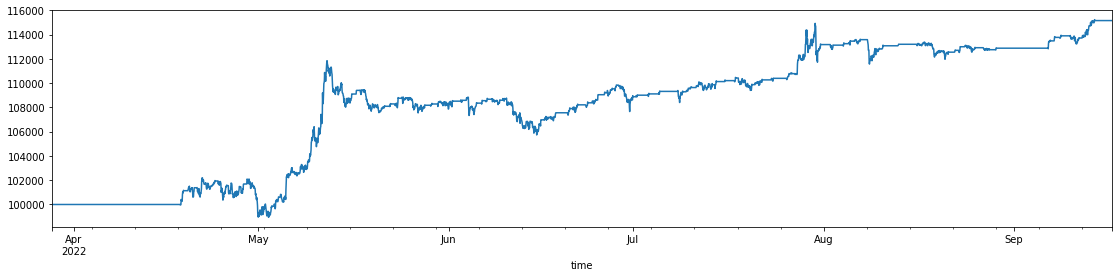

In [5]:
print(pf.total_return())

pf.value().plot(figsize=(19,4))

In [6]:
res = pf.trades.records_readable.groupby("Entry Timestamp").sum()

print(f"Total trades: {res.shape[0]}")
print(f"Executed trades: {pf.trades.records_readable.shape[0]}")
print(f"Profit Ratio: {res.PnL[res.PnL > 0].median() / np.abs(res.PnL[res.PnL < 0].median()):.3f}")
print(f"Net long-short win rate: {res.PnL[res.PnL > 0].shape[0] / res.shape[0] * 100:.2f}%")
print(f"Median trade profit: {res.PnL.median():.2f}")
print(f"Mean trade profit: {res.PnL.mean():.2f}")
print(f"STD of trade profit: {res.PnL.std():.2f}")
print(f"Sharpe Ratio: {pf.sharpe_ratio():.4f}")

Total trades: 114
Executed trades: 228
Profit Ratio: 0.913
Net long-short win rate: 78.07%
Median trade profit: 120.15
Mean trade profit: 133.03
STD of trade profit: 893.88
Sharpe Ratio: 2.7746


<AxesSubplot:xlabel='Entry Timestamp'>

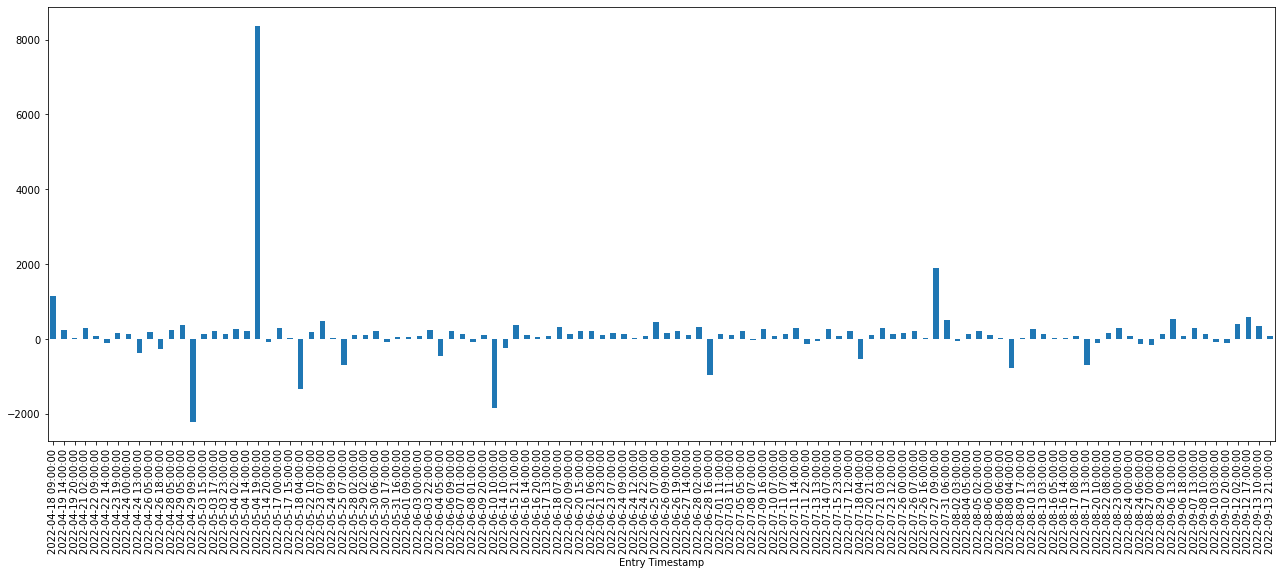

In [7]:
res.PnL.plot(kind="bar", figsize=(22,8))